In [1]:
# importing neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
Walmart_data = pd.read_csv("./Walmart.csv")
Walmart_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,86.269997,86.720001,85.550003,85.900002,73.388664,4501800
1,2015-01-05,85.720001,86.320000,85.510002,85.650002,73.175095,6979000
2,2015-01-06,85.980003,86.750000,85.790001,86.309998,73.738953,8205100
3,2015-01-07,86.779999,88.680000,86.669998,88.599998,75.695427,8498400
4,2015-01-08,89.209999,90.669998,89.070000,90.470001,77.293053,12713600
5,2015-01-09,90.320000,90.389999,89.250000,89.349998,76.336159,8522500
6,2015-01-12,89.360001,90.309998,89.220001,90.019997,76.908592,7372500
7,2015-01-13,90.800003,90.970001,88.930000,89.309998,76.302010,8215400
8,2015-01-14,87.650002,88.519997,86.500000,86.610001,73.995270,11954300
9,2015-01-15,87.000000,87.779999,86.699997,87.379997,74.653091,9412700


# Data Cleaning and Preprocessing

In [3]:
def check_data():
    return Walmart_data.empty

check_data()


False

In [4]:
records, features = Walmart_data.shape
print(f"The data contains {records} records and {features} features")


The data contains 1761 records and 7 features


In [5]:
Walmart_data.duplicated().sum()

0

In [6]:
Walmart_data.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
Walmart_data.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
Walmart_data['Close'].dropna(inplace=True)

In [9]:
Walmart_data = Walmart_data.reset_index()
Walmart_data['Date'] = pd.to_datetime(Walmart_data["Date"])
Walmart_data.set_index('Date', inplace=True)

In [10]:
for col in Walmart_data.columns:
    print(col, Walmart_data[col].nunique())


index 1761
Open 1541
High 1551
Low 1554
Close 1569
Adj Close 1700
Volume 1747


# Exploratory Data Analysis

In [11]:
Walmart_data_analysis = Walmart_data.copy()
for col in Walmart_data_analysis .columns:
    distinct = Walmart_data_analysis [col].nunique()
    if distinct == 2:
       Walmart_data_analysis [col] = Walmart_data_analysis [col].astype(int)

In [12]:
continuous_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
categorical_features = ['Date']

In [13]:
Walmart_data_analysis[continuous_features].describe()


,Open,High,Low,Close,Adj Close,Volume
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,98.967257,99.774872,98.216502,98.985599,93.493872,8.605073e+06
std,27.619235,27.869452,27.365368,27.603646,29.997491,4.947665e+06
min,56.389999,57.060001,56.299999,56.419998,49.131207,2.227400e+06
25%,73.430000,73.830002,73.059998,73.389999,65.350830,5.913500e+06
50%,94.500000,95.290001,93.820000,94.540001,89.093674,7.330400e+06
75%,119.919998,120.750000,119.019997,119.839996,116.259560,9.755400e+06
max,153.600006,153.660004,151.660004,152.789993,150.842651,8.089810e+07


# Data Visualization

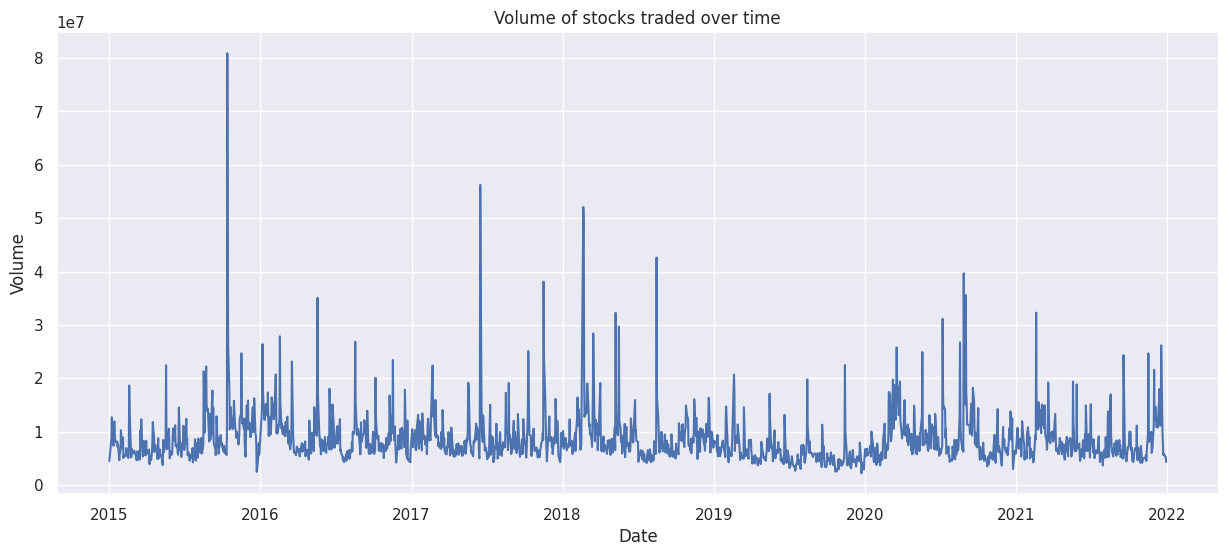

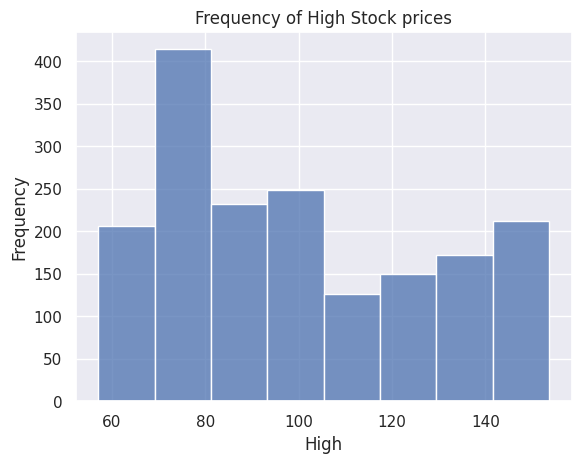

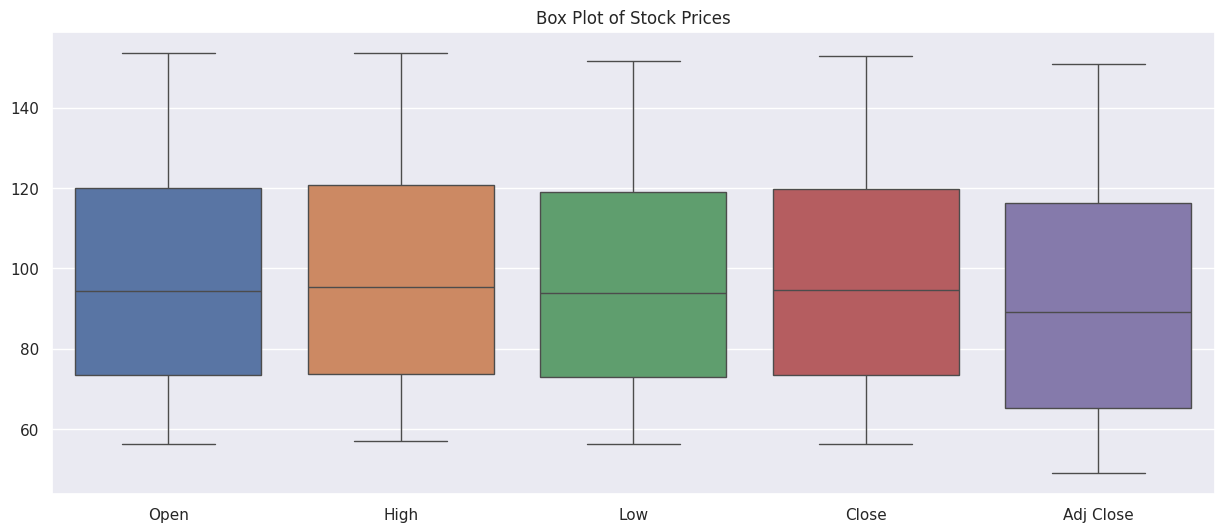

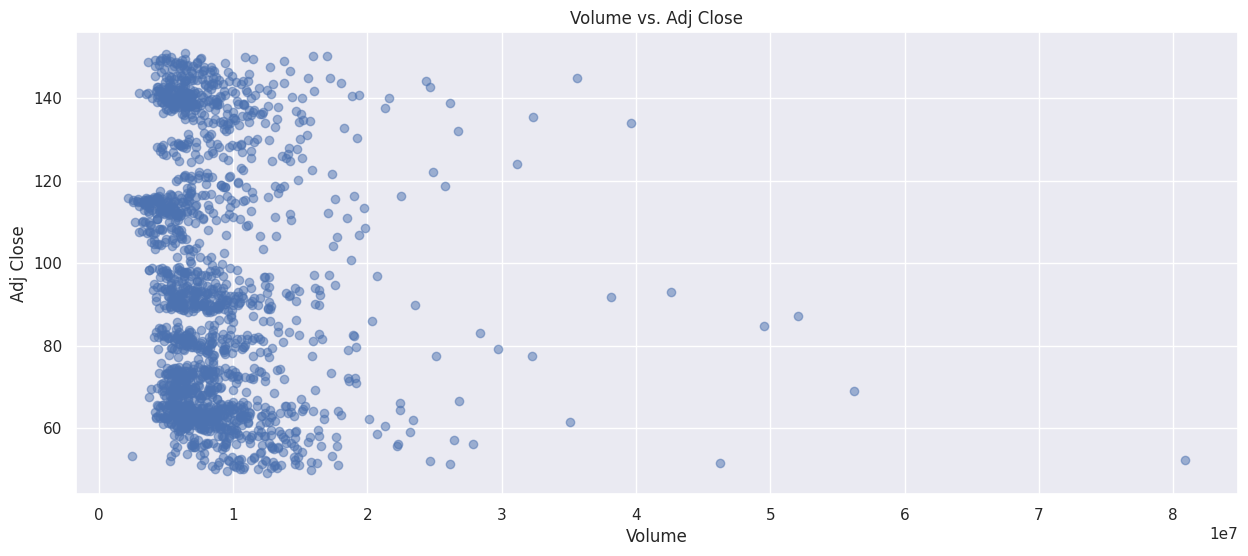

In [14]:
# Converting date column to datetime format

# Lineplot showing the Volume of stock traded over time
plt.figure(figsize=(15, 6))
sns.lineplot(data=Walmart_data, x='Date', y='Volume')
plt.title('Volume of stocks traded over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


# Histogram showing the frequency of the high prices
sns.histplot(Walmart_data["High"], bins=8)
plt.title('Frequency of High Stock prices')
plt.xlabel('High')
plt.ylabel('Frequency')
plt.show()


# Box plot showing the stock prices
stock_prices = ["Open", "High", "Low", "Close", "Adj Close"]
plt.figure(figsize=(15, 6))
sns.boxplot(data=Walmart_data[stock_prices])
plt.title('Box Plot of Stock Prices')
plt.show()


# Scatter plot of Volume vs Adj Close
plt.figure(figsize=(15, 6))
plt.scatter(Walmart_data['Volume'], Walmart_data['Adj Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Adj Close')
plt.title('Volume vs. Adj Close')
plt.show()

# Model Development & Training

In [19]:
close_prices = Walmart_data['Close'].values.reshape(-1, 1)

train_size = int(len(close_prices) * 0.9)
train_data, test_data = close_prices[:train_size], close_prices[train_size:]

model = sm.tsa.ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()

model_fit.forecast(4)

array([139.82509667, 139.8103792 , 139.81226125, 139.81202057])

# Model Evaluation

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


forecast = model_fit.forecast(steps=len(test_data))

mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)

r2 = r2_score(test_data, forecast)
evs = explained_variance_score(test_data, forecast)

mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
mpe = np.mean((test_data - forecast) / test_data) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Mean Squared Error (MSE): 24.75423095300816
Mean Absolute Error (MAE): 3.737032612774764
R2 Score: -0.508979931792104
Explained Variance Score: -1.5918526202973737e-05
Mean Absolute Percentage Error (MAPE): 2.5649254391481993
Mean Percentage Error (MPE): 1.9468082089608485


# Model Deployment

In [17]:
import joblib

# Export the model

joblib.dump(model_fit, 'arima_model.pkl')

['arima_model.pkl']